In [102]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [103]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [104]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [106]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop hostpital column because there is 96% of missing values in that column.
We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of the variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [107]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hostpital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [108]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [109]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

,adult_mortality,infant_mort,age1-4mort
0,383.5583,0.137985,0.025695
1,372.3876,0.133675,0.024500
2,354.5147,0.128320,0.023260
3,343.2169,0.122040,0.021925
4,333.8711,0.115700,0.020545


The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [110]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [111]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [112]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [113]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Montenegro      6
Serbia          6
Canada          5
Afghanistan     5
Name: country, dtype: int64

In [114]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

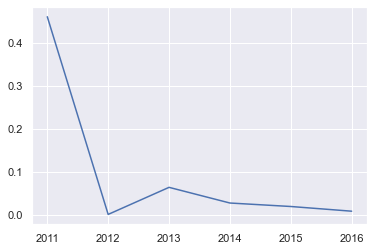

In [115]:
plt.plot('year', 'alcohol', data = sudan_df)

In [116]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

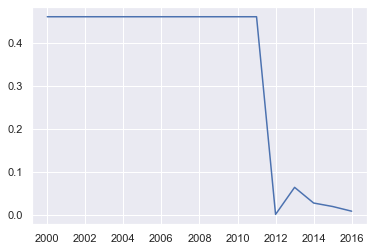

In [117]:
plt.plot('year', 'alcohol', data = sudan_df)

In [118]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [119]:
sudan_df.bfill(inplace = True)

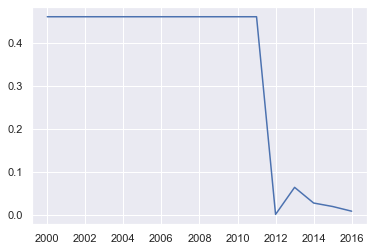

In [120]:
plt.plot('year', 'alcohol', data = sudan_df)

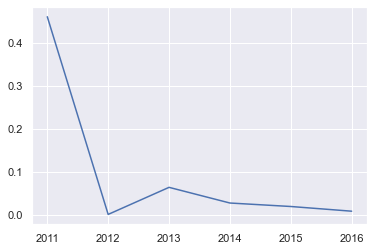

In [121]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [122]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

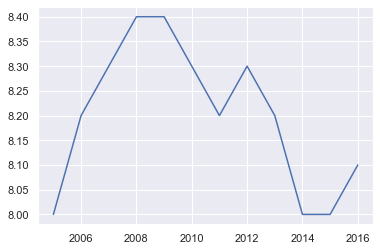

In [123]:
plt.plot('year', 'alcohol', data = canada_df)

In [124]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

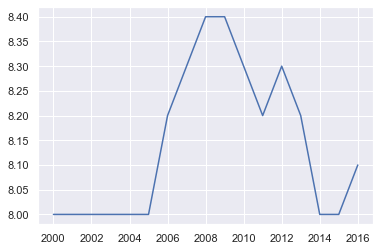

In [125]:
plt.plot('year', 'alcohol', data = canada_df)

In [126]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [127]:
canada_df.ffill(inplace = True)

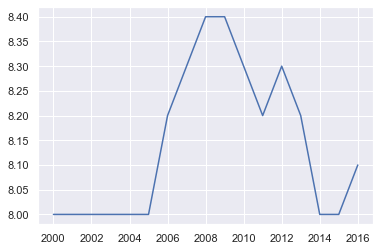

In [128]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

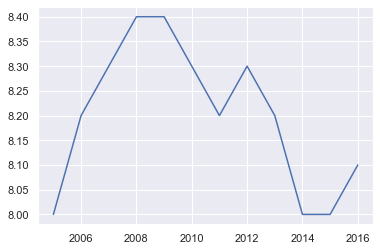

In [129]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

In [130]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])

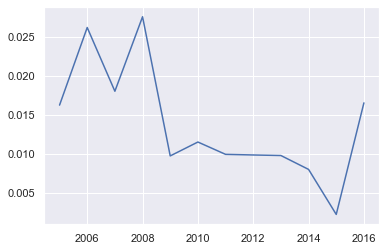

In [131]:
plt.plot('year', 'alcohol', data = afg_df)

In [132]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

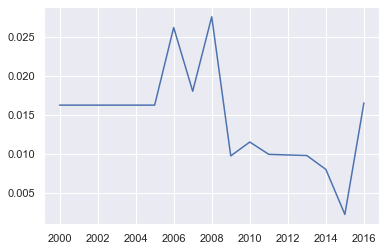

In [133]:
plt.plot('year', 'alcohol', data = afg_df)

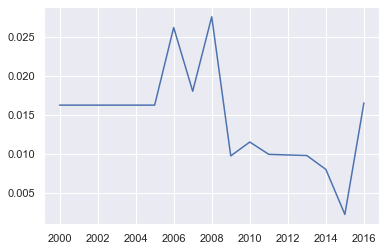

In [134]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

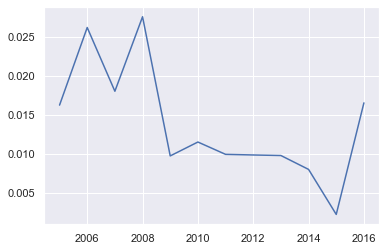

In [135]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [136]:
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [137]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

<ipython-input-137-ba402bbb7128>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [138]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [139]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [140]:
df[df['bmi'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [141]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [142]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [143]:
df[df['hepatitis'].isna()]['country'].value_counts()

Norway                17
Japan                 17
Hungary               17
Finland               17
Switzerland           17
                      ..
Mozambique             1
Panama                 1
Guyana                 1
Bahamas                1
Russian Federation     1
Name: country, Length: 99, dtype: int64

In [144]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

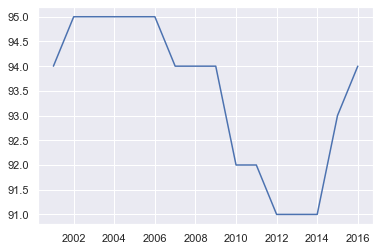

In [145]:
plt.plot('year', 'hepatitis', data = aus_df)

In [146]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

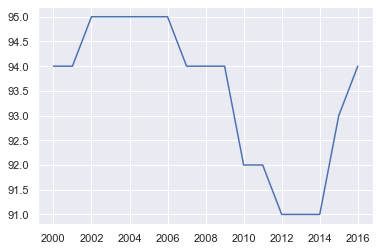

In [147]:
plt.plot('year', 'hepatitis', data = aus_df)

In [148]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

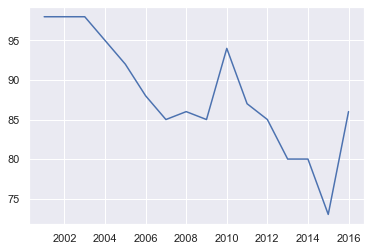

In [149]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [150]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

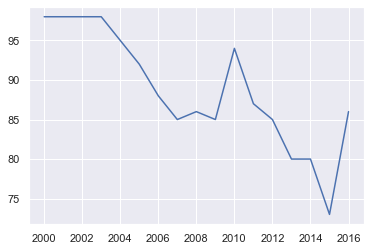

In [151]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [152]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [153]:
for country in countries:
    fill_na('hepatitis', country)

<ipython-input-139-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [154]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [155]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [156]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

<ipython-input-139-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [157]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# Exploratory Analysis

In [158]:
df.dtypes



country              object
region               object
year                  int64
life_expect         float64
life_exp60          float64
adult_mort_rate     float64
infant_mort_rate    float64
age1-4_mort_rate    float64
alcohol             float64
bmi                 float64
age5-19thinness     float64
age5-19obesity      float64
hepatitis           float64
measles             float64
polio               float64
diphtheria          float64
basic_water         float64
doctors             float64
gni_capita          float64
gghe-d              float64
che_gdp             float64
une_pop             float64
une_hiv             float64
dtype: object

# Anomaly Detection


In [159]:
df.shape

(3111, 23)

In [160]:
new_df = pd.DataFrame(df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3111 non-null   object 
 1   region            3111 non-null   object 
 2   year              3111 non-null   int64  
 3   life_expect       3111 non-null   float64
 4   life_exp60        3111 non-null   float64
 5   adult_mort_rate   3111 non-null   float64
 6   infant_mort_rate  3111 non-null   float64
 7   age1-4_mort_rate  3111 non-null   float64
 8   alcohol           3083 non-null   float64
 9   bmi               3077 non-null   float64
 10  age5-19thinness   3077 non-null   float64
 11  age5-19obesity    3077 non-null   float64
 12  hepatitis         2881 non-null   float64
 13  measles           3100 non-null   float64
 14  polio             3100 non-null   float64
 15  diphtheria        3100 non-null   float64
 16  basic_water       3100 non-null   float64


In [161]:

varwithna = new_df.drop(labels = ['country','region','life_exp60','adult_mort_rate','infant_mort_rate','age1-4_mort_rate'],axis =1)

In [162]:
varwithna

,year,life_expect,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_hiv
0,2000,47.33730,1.47439,21.7,11.0,0.5,43.0,32.0,21.0,31.0,41.14431,NaN,2190.0,1.11099,1.90860,16395.473,1.0
1,2001,48.19789,1.94025,21.8,10.9,0.5,43.0,60.0,28.0,42.0,42.25467,NaN,2290.0,2.04631,4.48352,16945.753,1.1
2,2002,49.42569,2.07512,21.9,10.7,0.6,43.0,59.0,22.0,47.0,43.37680,NaN,2690.0,1.30863,3.32946,17519.417,1.2
3,2003,50.50266,2.20275,22.0,10.5,0.7,43.0,44.0,21.0,46.0,44.36387,NaN,2820.0,1.46560,3.54797,18121.479,1.3
4,2004,51.52863,2.41274,22.2,10.3,0.8,43.0,43.0,18.0,47.0,45.35134,0.621,3080.0,1.68663,3.96720,18758.145,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,2012,64.49448,6.29833,22.4,9.2,3.1,79.0,72.0,78.0,79.0,72.07056,1.800,4170.0,0.43670,2.07638,6444.530,0.3
3107,2013,64.79716,6.42186,22.6,9.1,3.5,87.0,82.0,86.0,87.0,74.05544,4.493,4570.0,0.71266,2.39985,6541.304,0.3
3108,2014,65.10757,6.64447,22.7,9.0,3.8,88.0,87.0,88.0,88.0,76.02924,4.949,4570.0,0.68373,2.29846,6639.756,0.3
3109,2015,65.45008,6.83826,22.8,8.9,4.2,81.0,83.0,80.0,81.0,77.99142,4.949,4570.0,0.86391,2.45366,6741.164,0.3


In [163]:
#cluster based local outlier factor
jointDF = pd.concat([varwithna['life_expect'], varwithna['doctors']], axis = 1).reindex(varwithna['life_expect'].index)
jointDF

,life_expect,doctors
0,47.33730,NaN
1,48.19789,NaN
2,49.42569,NaN
3,50.50266,NaN
4,51.52863,0.621
...,...,...
3106,64.49448,1.800
3107,64.79716,4.493
3108,65.10757,4.949
3109,65.45008,4.949


In [164]:
jointDF.describe()

,life_expect,doctors
count,3111.000000,2216.000000
mean,69.146384,18.021928
std,9.129761,13.906474
min,36.227360,0.128000
25%,63.200095,4.346875
50%,71.597200,17.674500
75%,75.537030,28.570250
max,84.166160,79.541000


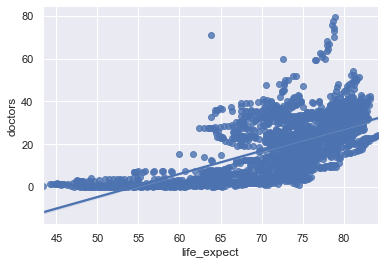

In [165]:
sb.regplot(x="life_expect", y="doctors", data=jointDF)
sb.despine();

In [166]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models

from pyod.models.cblof import CBLOF


ModuleNotFoundError: No module named 'pyod'

# Multivariate exploration


Dropped the categorical data in order to use heatmap 

In [167]:
df_numeric = df.drop(labels= ['country','region','year'],axis=1)
df_numeric.info()
df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   life_expect       3111 non-null   float64
 1   life_exp60        3111 non-null   float64
 2   adult_mort_rate   3111 non-null   float64
 3   infant_mort_rate  3111 non-null   float64
 4   age1-4_mort_rate  3111 non-null   float64
 5   alcohol           3083 non-null   float64
 6   bmi               3077 non-null   float64
 7   age5-19thinness   3077 non-null   float64
 8   age5-19obesity    3077 non-null   float64
 9   hepatitis         2881 non-null   float64
 10  measles           3100 non-null   float64
 11  polio             3100 non-null   float64
 12  diphtheria        3100 non-null   float64
 13  basic_water       3100 non-null   float64
 14  doctors           2216 non-null   float64
 15  gni_capita        3004 non-null   float64
 16  gghe-d            3043 non-null   float64


(3111, 20)

In [168]:
df_numeric.describe()


,life_expect,life_exp60,adult_mort_rate,infant_mort_rate,age1-4_mort_rate,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_hiv
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3083.000000,3077.000000,3077.000000,3077.000000,2881.000000,3100.000000,3100.000000,3100.000000,3100.000000,2216.000000,3004.000000,3043.000000,3026.000000,3.080000e+03,2380.000000
mean,69.146384,18.912060,0.193528,0.032496,0.003489,4.850654,25.052714,5.312447,5.972278,82.141617,85.530000,86.584194,86.406129,83.390295,18.021928,14329.687084,3.116490,6.119615,3.722953e+04,2.031513
std,9.129761,2.885412,0.114007,0.030361,0.005146,4.002535,2.193445,4.652408,4.530812,20.565142,15.282203,14.975650,15.335294,19.238249,13.906474,17262.440711,2.086198,2.514591,1.377832e+05,4.585364
min,36.227360,10.728000,0.049202,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,250.000000,0.062360,1.025160,7.601600e+01,0.100000
25%,63.200095,16.619485,0.108270,0.008255,0.000355,1.200510,23.300000,1.800000,2.000000,76.000000,79.000000,81.000000,82.000000,71.832918,4.346875,2690.000000,1.532075,4.234580,2.197585e+03,0.100000
50%,71.597200,18.508260,0.164822,0.019995,0.000895,4.021600,25.500000,3.800000,5.200000,91.000000,92.000000,93.000000,93.000000,92.203705,17.674500,8027.000000,2.601750,5.764255,8.568698e+03,0.400000
75%,75.537030,21.099175,0.250832,0.051720,0.004877,7.814025,26.500000,7.800000,8.900000,96.000000,96.000000,97.000000,97.000000,98.552870,28.570250,19655.000000,4.269990,7.880403,2.517140e+04,1.500000
max,84.166160,26.394020,0.696874,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,123860.000000,12.062730,20.413410,1.414049e+06,28.200000


In [169]:
print(df_numeric.corr())


                  life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
life_expect          1.000000    0.886159        -0.946419         -0.930113   
life_exp60           0.886159    1.000000        -0.775321         -0.769839   
adult_mort_rate     -0.946419   -0.775321         1.000000          0.813210   
infant_mort_rate    -0.930113   -0.769839         0.813210          1.000000   
age1-4_mort_rate    -0.864414   -0.661082         0.756230          0.909032   
alcohol              0.402975    0.465281        -0.250410         -0.448747   
bmi                  0.597996    0.458839        -0.517095         -0.641874   
age5-19thinness     -0.565396   -0.556536         0.455205          0.578230   
age5-19obesity       0.621000    0.547764        -0.571792         -0.602402   
hepatitis            0.398373    0.299663        -0.326215         -0.470327   
measles              0.640817    0.505314        -0.526452         -0.720781   
polio                0.646339    0.50197

<AxesSubplot:>

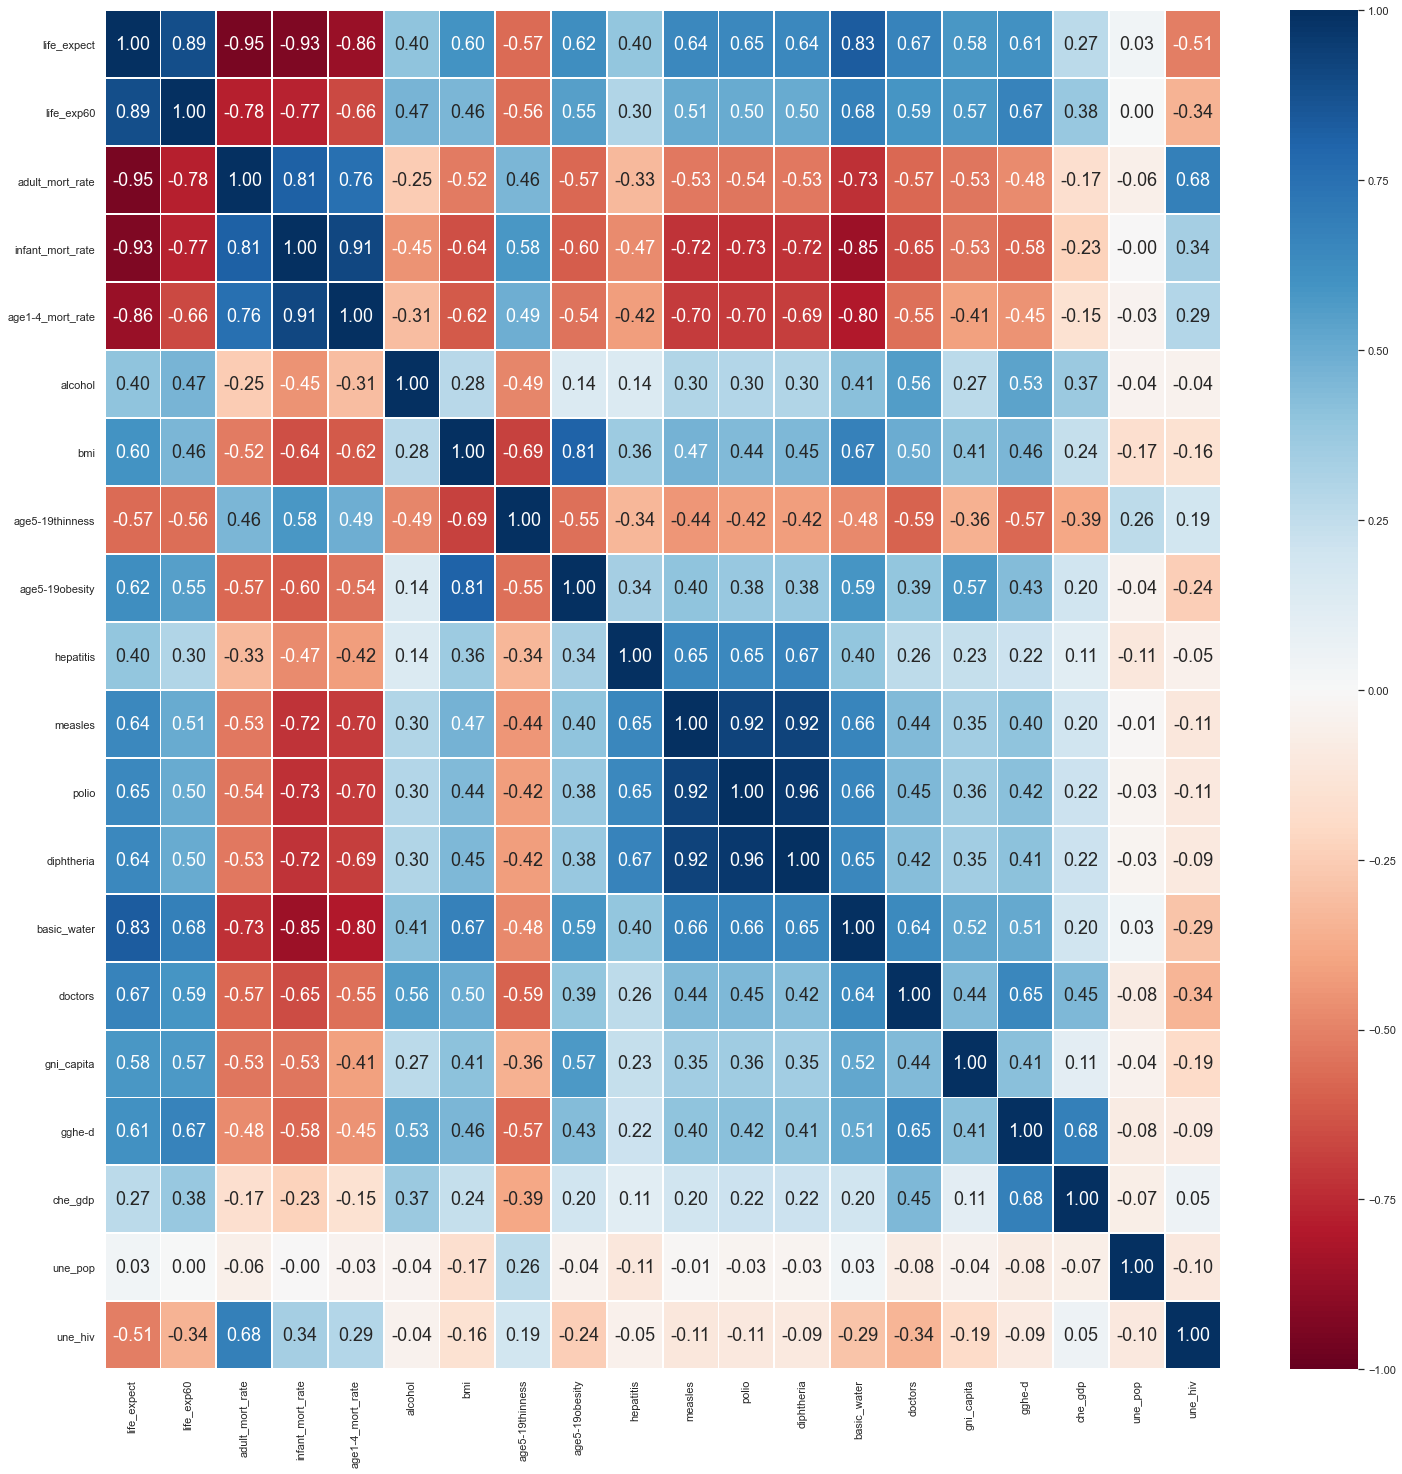

In [170]:
# Heatmap of the Correlation Matrix
#should i do according to regions? or year?
f = plt.figure(figsize=(25, 25))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [193]:
region_names = df['region'].unique()
region_names

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

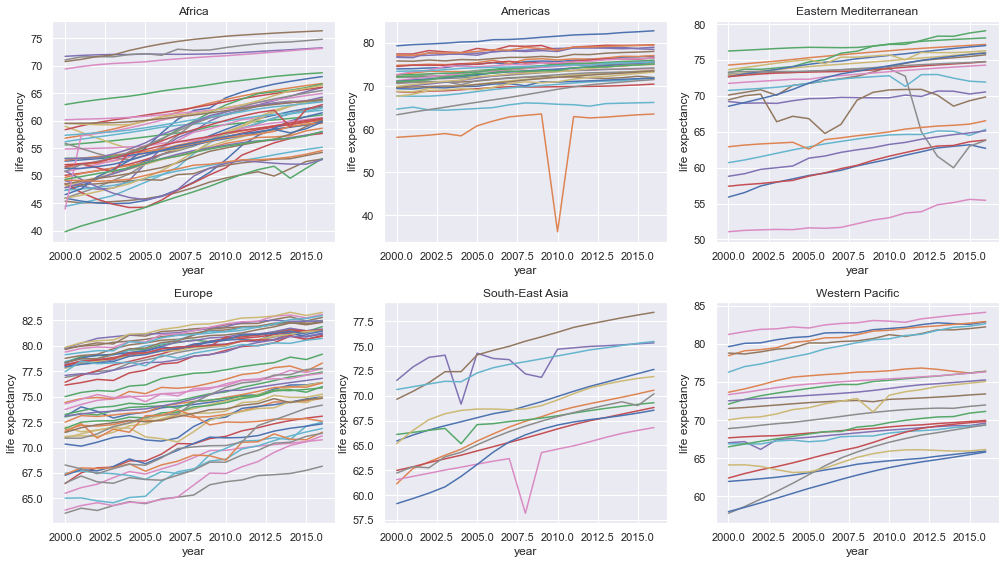

In [198]:
#cite this or find another way to represent this? like using plotly or smt but i cant import it
region_names = df['region'].unique()
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(14.0, 8.0)
for ireg, region in enumerate(region_names):
    ix = ireg//3
    iy = ireg%3
    axs[ix, iy].set_title(region)
    temp_df = df[df['region'] == region]
    for country in temp_df['country'].unique():
        axs[ix, iy].plot(temp_df[temp_df['country']==country].year, temp_df[temp_df['country']==country].life_expect)
    axs[ix, iy].set_xlabel("year")
    axs[ix, iy].set_ylabel("life expectancy")

plt.tight_layout()
plt.show()

In [215]:
life_expect = pd.DataFrame(df_numeric['life_expect'])
life_expect

,life_expect
0,47.33730
1,48.19789
2,49.42569
3,50.50266
4,51.52863
...,...
3106,64.49448
3107,64.79716
3108,65.10757
3109,65.45008


In [216]:
basic_water = pd.DataFrame(df_numeric['basic_water'])
basic_water

,basic_water
0,41.14431
1,42.25467
2,43.37680
3,44.36387
4,45.35134
...,...
3106,72.07056
3107,74.05544
3108,76.02924
3109,77.99142


In [227]:
water = pd.concat([basic_water,life_expect],axis=1).reindex(life_expect.index)
water
water.describe()

,basic_water,life_expect
count,3100.000000,3111.000000
mean,83.390295,69.146384
std,19.238249,9.129761
min,18.695210,36.227360
25%,71.832918,63.200095
50%,92.203705,71.597200
75%,98.552870,75.537030
max,100.000010,84.166160


compare 2 variables using jointplot in order to see which factor is the most significant

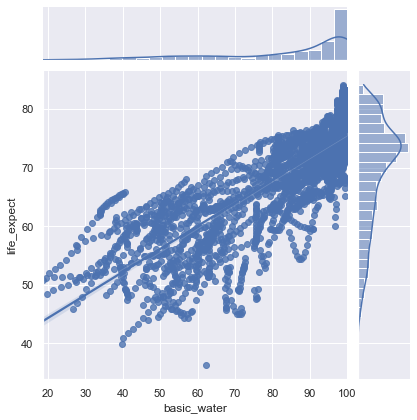

In [225]:
sb.jointplot(data=water, x="basic_water", y="life_expect", kind="reg")

From the heatmap some areas of interest are adult mortality rate, infant mortality rate and age1-4 mortality rate as they have the strongest negative correlation with life expectancy (-0.95,-0.93,-0.86 respectively)

In [217]:
adult_mort_rate = pd.DataFrame(df_numeric['adult_mort_rate'])
adult_mort_rate

,adult_mort_rate
0,0.383558
1,0.372388
2,0.354515
3,0.343217
4,0.333871
...,...
3106,0.209267
3107,0.205146
3108,0.200820
3109,0.196661


In [218]:
infant_mort_rate = pd.DataFrame(df_numeric['infant_mort_rate'])
infant_mort_rate

,infant_mort_rate
0,0.137985
1,0.133675
2,0.128320
3,0.122040
4,0.115700
...,...
3106,0.055840
3107,0.055350
3108,0.054585
3109,0.053465


In [219]:
child_mort_rate = pd.DataFrame(df_numeric['age1-4_mort_rate'])
child_mort_rate

,age1-4_mort_rate
0,0.025695
1,0.024500
2,0.023260
3,0.021925
4,0.020545
...,...
3106,0.004845
3107,0.004600
3108,0.004405
3109,0.004160


In [221]:
mort_rate = pd.concat([life_expect,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate

,life_expect,adult_mort_rate,infant_mort_rate,age1-4_mort_rate
0,47.33730,0.383558,0.137985,0.025695
1,48.19789,0.372388,0.133675,0.024500
2,49.42569,0.354515,0.128320,0.023260
3,50.50266,0.343217,0.122040,0.021925
4,51.52863,0.333871,0.115700,0.020545
...,...,...,...,...
3106,64.49448,0.209267,0.055840,0.004845
3107,64.79716,0.205146,0.055350,0.004600
3108,65.10757,0.200820,0.054585,0.004405
3109,65.45008,0.196661,0.053465,0.004160


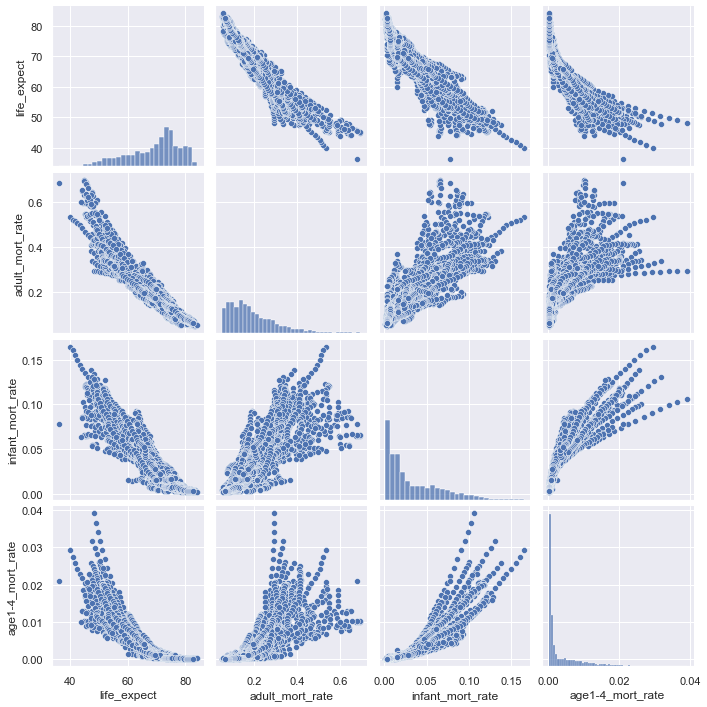

In [222]:
sb.pairplot(data = mort_rate)

There is a linear relationsip between mortality rates and life expectancy. As life expectancy increases, the mortality rates of adult, infant, and child from ages 1 to 4 all decrease as well. From the pairplot we can see that the relationship between adult mortality and life expectancy is the strongest followed by infant mortality rate and mortality rates from ages 1-4. 

We can explore what factors are significant in affecting mortality rate across age groups and if it is the same across all age groups. 

From the heatmap above we can see a relatively high correlation between the mortality rates and other factors as well. 

For adult mortality, it has strong correlation with infant mortality,child mortality and basic water at -0.81,-0.76 and -0.73 respectively.

For infant mortality, it has strong correlation between child mortality, adult mortality and basic water as well at -0.91,-0.81 and -0.85 respectively. Infant mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.73,-0.72 and -0.72 respectively.

For child mortality(ages 1-4), it has strong correlation between infant mortality, adult mortality and basic water as well at -0.91,-0.76 and -0.80 respectively.Child mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.70,-0.70 and -0.69 respectively.

Note that children under 5 are at high risk for polio, measles and diptheria.
